## Simulación del proceso completo de síntesis de proteínas
### **Lectura del archivo FASTA**

* Andrea Mayor Gómez 
* Laura Lasso García

In [1]:
from Bio import SeqIO
import random
import re

# Archivo FASTA de ejemplo proporcionado por Biopython
url_fasta = "https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta"

# Descargar el archivo FASTA desde la URL y guardarlo localmente
import urllib.request

# Guardamos el archivo en local
urllib.request.urlretrieve(url_fasta, "ls_orchid.fasta")

# Leer el archivo FASTA usando Biopython
with open("ls_orchid.fasta", "r") as archivo_fasta:
    # Contador para limitar a 3 ejemplos
    contador = 0
    for record in SeqIO.parse(archivo_fasta, "fasta"):
        print(f"ID: {record.id}")
        print(f"Descripción: {record.description}")
        print(f"Secuencia: {record.seq}\n")
        
        # Incrementar el contador
        contador += 1
        
        # Salir después de 3 ejemplos
        if contador >= 3:
            break  # Detener el bucle después de 3 registros

ID: gi|2765658|emb|Z78533.1|CIZ78533
Descripción: gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Secuencia: CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC

ID: gi|2765657|emb|Z78532.1|CCZ78532
Descripción: gi|2765657|emb|Z78532.1|CCZ78532 C.californicum 5.8S rRNA gene an

In [2]:
# Leer el archivo FASTA
with open("ls_orchid.fasta", "r") as archivo_fasta:
    for record in SeqIO.parse(archivo_fasta, "fasta"):
        secuencia_adn = record.seq
        #print("Secuencia original:", secuencia_adn)
        
        # Generar la cadena complementaria
        secuencia_adn_comp = secuencia_adn.complement()
        #print("Hebra complementaria:", secuencia_adn_comp)
        
        # Generar la hebra inversa complementaria
        #inversa_complementaria = secuencia_adn.reverse_complement()
        #print("Hebra inversa complementaria:", inversa_complementaria)

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Colores más suaves y modernos para las bases nitrogenadas
base_colors = {
    'A': '#4CAF50',  # Verde suave
    'T': '#FF5252',  # Rojo suave
    'G': '#42A5F5',  # Azul suave
    'C': '#FFEB3B',  # Amarillo suave
    'U': '#FF80AB'   # Rosa suave para ARN
}

# Aplicamos un estilo general similar a ggplot
plt.style.use('ggplot')

# Leyenda para ARN
def draw_legend_ARNm():
    plt.figure(figsize=(2, 1))
    ax = plt.gca()
    ax.add_patch(Rectangle((0.1, 0.7), 0.1, 0.1, facecolor=base_colors['A'], edgecolor='black', lw=1.5))
    plt.text(0.3, 0.75, 'Adenina (A)', fontsize=12, color='#333333', fontweight='bold')
    ax.add_patch(Rectangle((0.1, 0.5), 0.1, 0.1, facecolor=base_colors['U'], edgecolor='black', lw=1.5))
    plt.text(0.3, 0.55, 'Uracilo (U)', fontsize=12, color='#333333', fontweight='bold')
    ax.add_patch(Rectangle((0.1, 0.3), 0.1, 0.1, facecolor=base_colors['G'], edgecolor='black', lw=1.5))
    plt.text(0.3, 0.35, 'Guanina (G)', fontsize=12, color='#333333', fontweight='bold')
    ax.add_patch(Rectangle((0.1, 0.1), 0.1, 0.1, facecolor=base_colors['C'], edgecolor='black', lw=1.5))
    plt.text(0.3, 0.15, 'Citosina (C)', fontsize=12, color='#333333', fontweight='bold')
    plt.axis('off')

# Leyenda para ADN
def draw_legend():
    plt.figure(figsize=(2, 1))
    ax = plt.gca()
    ax.add_patch(Rectangle((0.1, 0.7), 0.1, 0.1, facecolor=base_colors['A'], edgecolor='black', lw=1.5))
    plt.text(0.3, 0.75, 'Adenina (A)', fontsize=12, color='#333333', fontweight='bold')
    ax.add_patch(Rectangle((0.1, 0.5), 0.1, 0.1, facecolor=base_colors['T'], edgecolor='black', lw=1.5))
    plt.text(0.3, 0.55, 'Timina (T)', fontsize=12, color='#333333', fontweight='bold')
    ax.add_patch(Rectangle((0.1, 0.3), 0.1, 0.1, facecolor=base_colors['G'], edgecolor='black', lw=1.5))
    plt.text(0.3, 0.35, 'Guanina (G)', fontsize=12, color='#333333', fontweight='bold')
    ax.add_patch(Rectangle((0.1, 0.1), 0.1, 0.1, facecolor=base_colors['C'], edgecolor='black', lw=1.5))
    plt.text(0.3, 0.15, 'Citosina (C)', fontsize=12, color='#333333', fontweight='bold')
    plt.axis('off')

# Representación de una cadena de ADN
def draw_dna(seq, title="ADN"):
    plt.figure(figsize=(10, 1))
    for i, base in enumerate(seq):
        plt.text(i + 0.5, 0.5, base, fontsize=20, color='#333333', fontweight='bold', ha='center')
        plt.gca().add_patch(Rectangle((i, 0), 1, 1, facecolor=base_colors[base], edgecolor='black', lw=1.5))

    plt.xlim(0, len(seq))
    plt.ylim(0, 1)
    plt.title(title, fontsize=16, color='#333333', fontweight='bold')
    plt.axis('off')


# Colores personalizados para los aminoácidos (ajustados para evitar repeticiones y asegurar coincidencias)
aminoacido_colors = {
    'Fenilalanina': '#FF9999', 'Leucina': '#FFCC99', 'Isoleucina': '#FFFF99', 'Metionina': '#CCFF99',
    'Valina': '#99FF99', 'Serina': '#99FFFF', 'Prolina': '#9999FF', 'Treonina': '#CC99FF', 
    'Alanina': '#FF99FF', 'Tirosina': '#FFCCFF', 'Histidina': '#CCCCCC', 'Glutamina': '#FFB3B3',
    'Asparagina': '#FFB3FF', 'Lisina': '#FFDDCC', 'Ácido aspártico': '#FF6666', 'Ácido glutámico': '#FF3333',
    'Cisteína': '#CCCC99', 'Triptófano': '#CC66CC', 'Arginina': '#6666FF', 'Glicina': '#66CCFF',
}

# Leyenda de aminoácidos en formato de 4 columnas y 5 filas
def draw_legend_aminoacidos():
    plt.figure(figsize=(8, 8))  # Ajustar el tamaño de la figura
    ax = plt.gca()
    
    # Número de columnas y filas
    num_columns = 4

    # Crear la leyenda de los aminoácidos
    for i, (aminoacido, color) in enumerate(aminoacido_colors.items()):
        col = i % num_columns
        row = i // num_columns
        x_pos = 0.1 + col * (0.22)  # Espacio horizontal entre columnas
        y_pos = 0.9 - (row * (0.18))  # Ajustar la posición vertical (inverso al 1 para estar en la parte superior)

        # Añadir el rectángulo con el color correspondiente
        ax.add_patch(Rectangle((x_pos, y_pos), 0.2, 0.1, facecolor=color, edgecolor='black', lw=1.5))  # Ancho del rectángulo ajustado
        plt.text(x_pos + 0.1, y_pos + 0.05, aminoacido, fontsize=10, color='#333333', fontweight='bold', ha='center', va='center')  # Alinear texto al centro

    plt.axis('off')
    plt.title("Leyenda de Aminoácidos", fontsize=14, fontweight='bold', pad=20)  # Título centrado y espaciado
    plt.show()

# Función para visualizar la traducción de una secuencia de ARNm a aminoácidos
def visualizar_traduccion_arn(proteina):
    plt.figure(figsize=(15, 2))
    
    # Limitar la visualización a 5 aminoácidos
    aminoacidos_a_mostrar = proteina[:12]

    for i, aminoacido in enumerate(aminoacidos_a_mostrar):
        # Colorear el cuadro de la proteina
        plt.gca().add_patch(Rectangle((i, 0), 1, 0.5, facecolor=aminoacido_colors.get(aminoacido, '#FFFFFF'), edgecolor='black', lw=1.5))
        
        # Mostrar el aminoácido correspondiente
        plt.text(i + 0.5, 0.25, aminoacido, fontsize=10, color='black', ha='center')

    plt.xlim(0, len(aminoacidos_a_mostrar))
    plt.ylim(0, 0.5)
    plt.axis('off')
    plt.title("Primeros 12 Aminoácidos de la Proteína", fontsize=16, color='#333333', fontweight='bold')
    plt.show()

###  **Replicación**

La **replicación** del ADN es el proceso mediante el cual una molécula de ADN se copia para crear dos moléculas idénticas, asegurando que las células hijas reciban la misma información genética. El código simula varias fases clave:
- **Topoisomerasa**: Relaja la tensión en la doble hélice antes de la separación de las hebras.
- **Helicasa**: Separa las dos hebras de ADN en la horquilla de replicación.
- **SSB (Proteínas de unión a hebra sencilla)**: Estabilizan las hebras separadas.
- **Primasa y polimerasa**: Sintetizan nuevos fragmentos de ADN a partir de cebadores de ARN.
- **Exonucleasa y ligasa**: Eliminan cebadores y unen fragmentos de Okazaki (en la hebra retardada).
El código genera dos nuevas moléculas de ADN: una hebra líder replicada de manera continua y una hebra retardada replicada de manera discontinua.

In [4]:
# bio-python
# Diccionario que define las bases complementarias
complement = {
    'A': 'T',
    'T': 'A',
    'C': 'G',
    'G': 'C'
}

# Función para simular la acción de la topoisomerasa (relaja la tensión)
def topoisomerasa(cadena):
    # Relaja la tensión en el ADN antes de que la helicasa lo separe
    print("\n----- Topoisomerasa -----")
    print("Topoisomerasa: Relajando la tensión de la molécula de ADN.")
    return cadena  # Para fines de simulación, devolvemos la cadena tal como está

# Función para representar la acción de la helicasa (separación de hebras en la horquilla)
def helicasa(hebra1, hebra2):
    # Simula la separación de las hebras
    print("\n----- Helicasa -----")
    print("Helicasa: Separando las dos hebras de ADN en la horquilla de replicación.")
    return hebra1, hebra2

# Simulación de proteínas de unión a hebra sencilla (SSB) para estabilizar las hebras separadas
def ssb(hebra):
    # Proteínas estabilizan la hebra sencilla
    print("\n----- Proteínas SSB -----")
    print("Proteínas SSB: Estabilizando la hebra sencilla para evitar su reconexión.")
    return hebra

# Función para representar la ADN primasa (colocación de un primer de ARN)
def adn_primasa(hebra):
    # El primer de ARN tiene bases complementarias y típicamente es corto (ej: 5-10 bases)
    #print("ADN primasa: Creando un primer de ARN en la hebra.")
    primer = ''.join([complement[base] for base in hebra[:10]])  # Primer simulado de 10 bases
    return primer

# Función para representar la ADN polimerasa (síntesis de ADN)
def adn_polimerasa(hebra, primer):
    # Completar la hebra a partir del primer
    #print("ADN polimerasa: Sintetizando la nueva hebra complementaria.")
    nueva_hebra = primer + ''.join([complement[base] for base in hebra])
    return nueva_hebra

# Función para simular la acción de la ADN ligasa (unir fragmentos de Okazaki)
def adn_ligasa(fragmentos_okazaki):
    # Unir todos los fragmentos de Okazaki
    print("\n----- ADN Ligasa -----")
    print("ADN ligasa: Uniendo los fragmentos de Okazaki en la hebra retardada.")
    hebra_completa = ''.join(fragmentos_okazaki)
    return hebra_completa

class exonucleasa:
    def __init__(self):
        pass
    def exonucleasa_retardada(self, fragmentos):
        fragmentos_sin_primers = []
        for fragmento in fragmentos:
            primer = fragmento[:10]
            complemento = fragmento[10:20]

            #print("Exonucleasa: Eliminando el primer de cada fragmento.")
            sustituto_primer, complemento = adn_polimerasa1(primer, complemento)
            fragmento_completo = sustituto_primer + complemento

            fragmentos_sin_primers.append(fragmento_completo)
        return fragmentos_sin_primers
    def exonucleasa_lider(self, hebra):
        primer = hebra[:10]
        complemento = hebra[10:]
        print("\n----- Exonucleasa -----")
        print('Exonucleasa: Eliminando el primer de la cadena líder.')

        sustituto_primer, hebra = adn_polimerasa1(primer, complemento)
        cadena_completa = sustituto_primer + complemento
        return cadena_completa
exon = exonucleasa()

def adn_polimerasa1(primer, complemento):
    #print("\n----- ADN Polimerasa I -----")
    #print("ADN polimerasa I: Sustituyendo el primer por los nucleótidos correspondientes.")
    sustituto_primer = primer
    return sustituto_primer, complemento

# Función para simular la replicación de la hebra líder (replicación continua)
def replicar_hebra_lider(hebra_lider):
    ssb(hebra_lider)  # Estabilizar la hebra separada
    primer = adn_primasa(hebra_lider)  # Añadir un primer de ARN
    nueva_hebra = adn_polimerasa(hebra_lider[10:], primer)  # Sintetizar la nueva hebra
    hebra_sin_primer = exon.exonucleasa_lider(nueva_hebra)

    return hebra_sin_primer

def replicar_hebra_retardada(hebra_retardada):
    ssb(hebra_retardada)  # Estabilizar la hebra separada
    
    # Fragmentos de Okazaki (simular como si fueran fragmentos de 20 bases: 10 para el primer y 10 para la polimerasa)
    fragmentos = []
    
    for i in range(0, len(hebra_retardada), 20):
        # El primer cubrirá los primeros 10 nucleótidos
        primer = adn_primasa(hebra_retardada[i:i+10])
        
        # La ADN polimerasa añadirá otros 10 nucleótidos a partir del final del primer
        fragmento = adn_polimerasa(hebra_retardada[i+10:i+20], primer)
        
        fragmentos.append(fragmento) # [20 nucleótidos (primer y lo otro)]
    
    hebra_sin_primers = exon.exonucleasa_retardada(fragmentos)
    # Unir los fragmentos con ADN ligasa
    hebra_completa = adn_ligasa(hebra_sin_primers)
    
    return hebra_completa


# Función para simular la replicación completa de una molécula de ADN de doble hélice
def replicacion_completa_adn(hebra1, hebra2):
    print("\n===== Iniciando la replicación de ADN =====")
    global hebra_lider, nueva_hebra_lider, hebra_retardada, nueva_hebra_retardada
    # 1. Relajar la tensión en el ADN con la topoisomerasa
    hebra1 = topoisomerasa(hebra1)
    hebra2 = topoisomerasa(hebra2)

    # 2. Separar las hebras con helicasa en la horquilla de replicación
    hebra_lider, hebra_retardada = helicasa(hebra1, hebra2)
    
    # 3. Replicar la hebra líder (continua) y la hebra retardada (discontinua)
    nueva_hebra_lider = replicar_hebra_lider(hebra_lider)
    nueva_hebra_retardada = replicar_hebra_retardada(hebra_retardada)
    
    # Resultado: Dos moléculas de ADN, cada una con una hebra original y una nueva hebra sintetizada
    print("\n===== Resultados de la replicación =====")
    print(f"Hebra líder original:    {hebra_lider}")
    print(f"Nueva hebra líder:       {nueva_hebra_lider}")
    print(f"Hebra retardada original: {hebra_retardada}")
    print(f"Nueva hebra retardada:    {nueva_hebra_retardada}")
    
    return (hebra_lider, nueva_hebra_lider), (hebra_retardada, nueva_hebra_retardada)

# Ejemplo de uso con ADN de doble hélice
hebra_original_1 = str(secuencia_adn)  # Hebra original (3' -> 5')
hebra_original_2 =  str(secuencia_adn_comp) # Hebra complementaria (5' -> 3')

(hebra_lider, nueva_hebra_lider), (hebra_retardada, nueva_hebra_retardada) = replicacion_completa_adn(hebra_original_1, hebra_original_2)



===== Iniciando la replicación de ADN =====

----- Topoisomerasa -----
Topoisomerasa: Relajando la tensión de la molécula de ADN.

----- Topoisomerasa -----
Topoisomerasa: Relajando la tensión de la molécula de ADN.

----- Helicasa -----
Helicasa: Separando las dos hebras de ADN en la horquilla de replicación.

----- Proteínas SSB -----
Proteínas SSB: Estabilizando la hebra sencilla para evitar su reconexión.

----- Exonucleasa -----
Exonucleasa: Eliminando el primer de la cadena líder.

----- Proteínas SSB -----
Proteínas SSB: Estabilizando la hebra sencilla para evitar su reconexión.

----- ADN Ligasa -----
ADN ligasa: Uniendo los fragmentos de Okazaki en la hebra retardada.

===== Resultados de la replicación =====
Hebra líder original:    CATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTACTTTGGTCACCCATGGGCATTTGCTGTTGAAGTGACCTAGATTTGCCATCGAGCCTCCTTGGGAGCTTTCTTGTTGGCGAGATCTAAACCCCTGCCCGGCGGAGTTGGGCGCCAAGTCATATGACACATAATTGGTGAAGGGGGTGGTAATCCTGCCCTGACCCTCCCCAAATTATTTTTTTAACAACTCTCAG

#### **Representación**

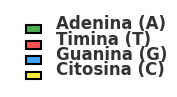

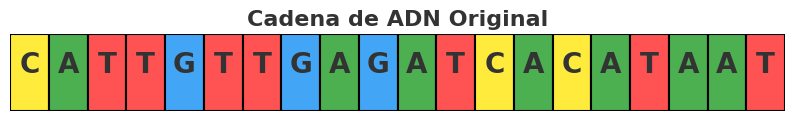

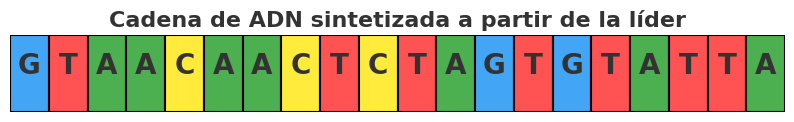

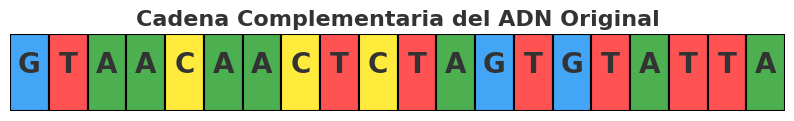

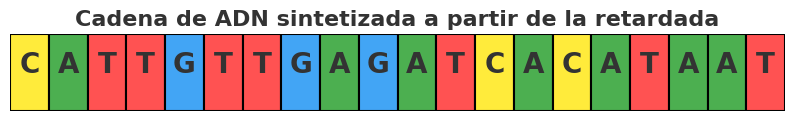

In [5]:
# Representación
draw_legend() 
draw_dna(hebra_lider[0:20], title="Cadena de ADN Original")
draw_dna(nueva_hebra_lider[0:20], title="Cadena de ADN sintetizada a partir de la líder")

draw_dna(hebra_retardada[0:20], title="Cadena Complementaria del ADN Original")
draw_dna(nueva_hebra_retardada[0:20], title="Cadena de ADN sintetizada a partir de la retardada")


In [9]:
# Función para encontrar errores en la replicación
def encontrar_errores(hebra_original, hebra_sintetizada):
    errores = []  # Lista para almacenar las posiciones de los errores
    # Comparar ambas cadenas
    for i in range(len(hebra_original)):
        # Verificar si hay discrepancia en la posición i
        if hebra_original[i] != hebra_sintetizada[i]:
            errores.append((i, hebra_original[i], hebra_sintetizada[i]))
    
    return errores

# Función ADN polimerasa que sintetiza y corrige errores
def adn_polimerasa_corregir(hebra_sintetizada, errores_encontrados):
    # Crear una lista mutable a partir de la hebra sintetizada
    hebra_lista = list(hebra_sintetizada)
    
    # Corregir cada error encontrado
    for posicion, original, sintetizada in errores_encontrados:
        print(f"Corrigiendo error en la posición {posicion}: {sintetizada} -> {original[posicion]}")
        hebra_lista[posicion] = original[posicion]  # Reemplazar el nucleótido incorrecto
    
    # Unir de nuevo la hebra corregida en una cadena
    hebra_corregida = ''.join(hebra_lista)
    
    return hebra_corregida

# Ejemplo de uso:
errores_encontrados = encontrar_errores(hebra_retardada, nueva_hebra_lider)
errores_encontrados += encontrar_errores(nueva_hebra_retardada, hebra_lider)

if errores_encontrados:
    print("Errores encontrados:")
    for posicion, original, sintetizada in errores_encontrados:
        print(f"Posición: {posicion}, Original: {original}, Sintetizada: {sintetizada}")
    
    # Corregir errores con ADN polimerasa
    hebra_corregida = adn_polimerasa_corregir(nueva_hebra_retardada, errores_encontrados)
    print(f"Hebra corregida: {hebra_corregida}")
else:
    print("No se encontraron errores.")


No se encontraron errores.


### **Transcripción**

La **transcripción** es el proceso en el que se copia la información genética del ADN a una molécula de ARN mensajero (ARNm). Este código simula las tres fases:
- **Iniciación**: Factores de transcripción se unen a secuencias promotoras en el ADN (como "CAAT" o "TATA") para iniciar la transcripción. Luego, la ARN polimerasa II se une al promotor.
- **Elongación**: La ARN polimerasa sintetiza la nueva cadena de ARN a partir de una hebra molde del ADN.
- **Terminación**: Se detecta la secuencia de terminación "AAUAAA", se separa la ARN polimerasa, y se añade una cola de poliA al ARNm.
Finalmente, el pre-ARNm se procesa eliminando los intrones mediante el espliceosoma, dejando un ARNm maduro listo para la traducción.

In [37]:
# Diccionario que define las bases complementarias para transcripción
transcripcion_complement = {
    'A': 'U',  # Adenina en ADN se convierte en Uracilo en ARN
    'T': 'A',  # Timina en ADN se convierte en Adenina en ARN
    'C': 'G',  # Citosina en ADN se convierte en Guanina en ARN
    'G': 'C'   # Guanina en ADN se convierte en Citosina en ARN
}

# FASE DE INICIACIÓN
def buscar_caat_tata(cadena):
    # Buscar "CAAT" en la cadena
    pos_caat = cadena.find('CAAT')
    if pos_caat != -1:
        return {'CAAT': pos_caat}
    
    # Si no encontró "CAAT", buscar "TATA"
    pos_tata = cadena.find('TATA')
    if pos_tata != -1:
        return {'TATA': pos_tata}
    
    return "No se encontró CAAT o TATA en la cadena."

def factores_transcripcion_generales(hebra5_3, hebra3_5):
    print("\n" + "-" * 50)
    print("FASE DE INICIACIÓN: Formación del complejo de transcripción")
    print("-" * 50)

    sitio_reconocimiento = buscar_caat_tata(hebra3_5)
    print(f"=> Factores de transcripción generales: Uniéndose a las secuencias del promotor en {sitio_reconocimiento}.")
    
    numero_aleatorio = random.randint(0, 10)
    if 0 <= numero_aleatorio <= 5:
        hebra5_3, hebra3_5 = factores_transcripcion_especificos(hebra5_3, hebra3_5)

    return hebra5_3, hebra3_5, sitio_reconocimiento

def factores_transcripcion_especificos(hebra5_3, hebra3_5):
    print("=> Factores de transcripción específicos: Uniéndose a potenciadores/silenciadores.")
    return hebra5_3, hebra3_5

# FASE DE ELONGACIÓN
def ARN_polimerasa_II(hebra5_3, hebra3_5, sitio_reconocimiento):
    print("\n" + "-" * 50)
    print("FASE DE ELONGACIÓN: ARN polimerasa II")
    print("-" * 50)

    print(f"=> ARN polimerasa II: Uniéndose al promotor en {sitio_reconocimiento}")
    print("Separando las cadenas...")

    posicion_inicio = list(sitio_reconocimiento.values())[0]
    primera_sintesis = ''.join([transcripcion_complement[base] for base in hebra3_5[posicion_inicio:posicion_inicio+30]])
    print("Añadiendo un casquete/capucha al extremo 5' después de 30 nucleótidos transcritos...")

    segunda_sintesis = ''
    pre_ARNm = ''
    
    for base in hebra3_5[posicion_inicio + 30:]:
        segunda_sintesis += transcripcion_complement[base]
    
        if segunda_sintesis[-6:] == 'AAUAAA':
            pre_ARNm = primera_sintesis + segunda_sintesis
            print(f"\nSe ha encontrado la secuencia de señalización de poliadenilación en la posición {len(pre_ARNm)}.")
            print("FASE DE TERMINACIÓN: Señalización detectada.")
            break
        else:
            pre_ARNm = primera_sintesis + segunda_sintesis
    
    return hebra5_3, hebra3_5, pre_ARNm

# FASE DE TERMINACIÓN
def factores_corte_poliadenilacion(hebra5_3, hebra3_5, pre_ARNm):
    print("\n" + "-" * 50)
    print("FASE DE TERMINACIÓN: Corte y Poliadenilación")
    print("-" * 50)

    print("=> Factores de corte: Separando la ARN polimerasa II del pre-ARNm.")
    return hebra5_3, hebra3_5, pre_ARNm

def poliA_polimerasa(pre_ARNm):
    print("=> PoliA polimerasa: Añadiendo la cola de poliA al extremo 3' del pre-ARNm.")
    return pre_ARNm

# FASE DE MADURACIÓN
def RNPpn_ARNpn(pre_ARNm):
    print("\n" + "-" * 50)
    print("FASE DE MADURACIÓN: Eliminación de intrones")
    print("-" * 50)

    print("=> Espliceosoma: Eliminando los intrones del pre-ARNm...")
    
    patron_intrones = re.compile(r'GU.*?AG')
    exones = re.sub(patron_intrones, '', pre_ARNm)
    exones = re.findall(r'.{1,3}', exones)
    
    return exones

def ARN_ligasa(exones):
    print("=> ARN ligasa: Realizando el proceso de splicing.")
    ARNm_maduro = ''.join(exones)
    return ARNm_maduro

# Función principal: Proceso completo de transcripción
def proceso_transcripcion(hebra5_3, hebra3_5):
    hebra5_3, hebra3_5, sitio_reconocimiento = factores_transcripcion_generales(hebra5_3, hebra3_5)
    hebra5_3, hebra3_5, pre_ARNm = ARN_polimerasa_II(hebra5_3, hebra3_5, sitio_reconocimiento)
    hebra5_3, hebra3_5, pre_ARNm = factores_corte_poliadenilacion(hebra5_3, hebra3_5, pre_ARNm)
    pre_ARNm = poliA_polimerasa(pre_ARNm)

    print("\n" + "=" * 50)
    print("FASE DE MADURACIÓN: ARN Mensajero maduro")
    print("=" * 50)

    exones = RNPpn_ARNpn(pre_ARNm)
    ARNm_maduro = ARN_ligasa(exones)
    
    print(f"\nARNm maduro final: {ARNm_maduro}")
    return ARNm_maduro

# Ejemplo de uso
hebra5_3 = str(secuencia_adn)  # Hebra original (5' -> 3')
hebra3_5 =  str(secuencia_adn_comp)  # Hebra complementaria (3' -> 5') es la que se usará como molde

ARNm_maduro = proceso_transcripcion(hebra5_3, hebra3_5)



--------------------------------------------------
FASE DE INICIACIÓN: Formación del complejo de transcripción
--------------------------------------------------
=> Factores de transcripción generales: Uniéndose a las secuencias del promotor en {'CAAT': 30}.

--------------------------------------------------
FASE DE ELONGACIÓN: ARN polimerasa II
--------------------------------------------------
=> ARN polimerasa II: Uniéndose al promotor en {'CAAT': 30}
Separando las cadenas...
Añadiendo un casquete/capucha al extremo 5' después de 30 nucleótidos transcritos...

--------------------------------------------------
FASE DE TERMINACIÓN: Corte y Poliadenilación
--------------------------------------------------
=> Factores de corte: Separando la ARN polimerasa II del pre-ARNm.
=> PoliA polimerasa: Añadiendo la cola de poliA al extremo 3' del pre-ARNm.

FASE DE MADURACIÓN: ARN Mensajero maduro

--------------------------------------------------
FASE DE MADURACIÓN: Eliminación de intrones


#### **Representación**

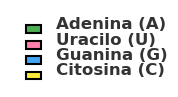

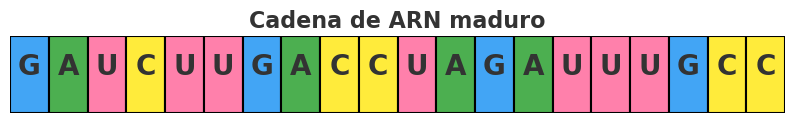

In [38]:
# Representación
draw_legend_ARNm() 
draw_dna(ARNm_maduro[0:20], title="Cadena de ARN maduro")

### **Traducción**

La **traducción** convierte la secuencia de nucleótidos del ARNm en una cadena de aminoácidos, formando una proteína. El código realiza este proceso:
- **Lectura de codones**: La secuencia de ARNm se lee en grupos de tres nucleótidos (codones), y cada codón se traduce en un aminoácido usando una tabla de codones.
- **Codón de parada**: Si se encuentra un codón de parada, la traducción se detiene.
El resultado es una cadena de proteínas (aminoácidos) que corresponde a la información codificada en el ARNm.

In [39]:
codones_aminoacidos = {
    'UUU': 'Fenilalanina', 'UUC': 'Fenilalanina', 'UUA': 'Leucina', 'UUG': 'Leucina',
    'CUU': 'Leucina', 'CUC': 'Leucina', 'CUA': 'Leucina', 'CUG': 'Leucina',
    'AUU': 'Isoleucina', 'AUC': 'Isoleucina', 'AUA': 'Isoleucina', 'AUG': 'Metionina', # Iniciación
    'GUU': 'Valina', 'GUC': 'Valina', 'GUA': 'Valina', 'GUG': 'Valina',
    'UCU': 'Serina', 'UCC': 'Serina', 'UCA': 'Serina', 'UCG': 'Serina',
    'CCU': 'Prolina', 'CCC': 'Prolina', 'CCA': 'Prolina', 'CCG': 'Prolina',
    'ACU': 'Treonina', 'ACC': 'Treonina', 'ACA': 'Treonina', 'ACG': 'Treonina',
    'GCU': 'Alanina', 'GCC': 'Alanina', 'GCA': 'Alanina', 'GCG': 'Alanina',
    'UAU': 'Tirosina', 'UAC': 'Tirosina', 'UAA': 'Parada', 'UAG': 'Parada',
    'CAU': 'Histidina', 'CAC': 'Histidina', 'CAA': 'Glutamina', 'CAG': 'Glutamina',
    'AAU': 'Asparagina', 'AAC': 'Asparagina', 'AAA': 'Lisina', 'AAG': 'Lisina',
    'GAU': 'Ácido aspártico', 'GAC': 'Ácido aspártico', 'GAA': 'Ácido glutámico', 'GAG': 'Ácido glutámico',
    'UGU': 'Cisteína', 'UGC': 'Cisteína', 'UGA': 'Parada', 'UGG': 'Triptófano',
    'CGU': 'Arginina', 'CGC': 'Arginina', 'CGA': 'Arginina', 'CGG': 'Arginina',
    'AGU': 'Serina', 'AGC': 'Serina', 'AGA': 'Arginina', 'AGG': 'Arginina',
    'GGU': 'Glicina', 'GGC': 'Glicina', 'GGA': 'Glicina', 'GGG': 'Glicina'
}

In [40]:
# Función para realizar la traducción de una secuencia de ARNm a una cadena de aminoácidos
def traducir_arn_a_proteina(ARNm_maduro):
    print("\n" + "=" * 50)
    print("FASE DE TRADUCCIÓN: De ARNm a Proteína")
    print("=" * 50)

    # Verificar si la secuencia es múltiplo de 3
    if len(ARNm_maduro) % 3 != 0:
        print("Advertencia: La secuencia de ARN no es múltiplo de 3, truncando la secuencia.")
        ARNm_maduro = ARNm_maduro[:-(len(ARNm_maduro) % 3)]  # Truncar si es necesario
    
    # Inicializar la lista de aminoácidos
    proteina = []

    print("\nIniciando la traducción de codones a aminoácidos:")
    print("-" * 50)

    # Iterar sobre la secuencia de ARN en grupos de 3 (codones)
    for i in range(0, len(ARNm_maduro), 3):
        codon = ARNm_maduro[i:i+3]  # Obtener el codón actual
        aminoacido = codones_aminoacidos.get(codon.upper(), 'Codón no reconocido')  # Traducir el codón
        print(f"Codón {codon} --> Aminoácido: {aminoacido}")
        
        # Si encontramos un codón de parada, detener la traducción
        if aminoacido == 'Parada':
            print("\nCodón de parada encontrado. Finalizando traducción.")
            break
        
        # Añadir el aminoácido a la lista
        proteina.append(aminoacido)
    
    print("-" * 50)
    return proteina

# Realizar la traducción
proteina = traducir_arn_a_proteina(ARNm_maduro)

# Imprimir la cadena de proteínas resultante
print("\n" + "=" * 50)
print("CADENA FINAL DE PROTEÍNAS:")
print("=" * 50)
print(f"Cadena de proteínas: {', '.join(proteina)}")



FASE DE TRADUCCIÓN: De ARNm a Proteína
Advertencia: La secuencia de ARN no es múltiplo de 3, truncando la secuencia.

Iniciando la traducción de codones a aminoácidos:
--------------------------------------------------
Codón GAU --> Aminoácido: Ácido aspártico
Codón CUU --> Aminoácido: Leucina
Codón GAC --> Aminoácido: Ácido aspártico
Codón CUA --> Aminoácido: Leucina
Codón GAU --> Aminoácido: Ácido aspártico
Codón UUG --> Aminoácido: Leucina
Codón CCA --> Aminoácido: Prolina
Codón UCG --> Aminoácido: Serina
Codón AGC --> Aminoácido: Serina
Codón CUC --> Aminoácido: Leucina
Codón CUU --> Aminoácido: Leucina
Codón GGG --> Aminoácido: Glicina
Codón AGC --> Aminoácido: Serina
Codón UUU --> Aminoácido: Fenilalanina
Codón CUU --> Aminoácido: Leucina
Codón AUC --> Aminoácido: Isoleucina
Codón UAA --> Aminoácido: Parada

Codón de parada encontrado. Finalizando traducción.
--------------------------------------------------

CADENA FINAL DE PROTEÍNAS:
Cadena de proteínas: Ácido aspártico, Leuc

#### **Representación**

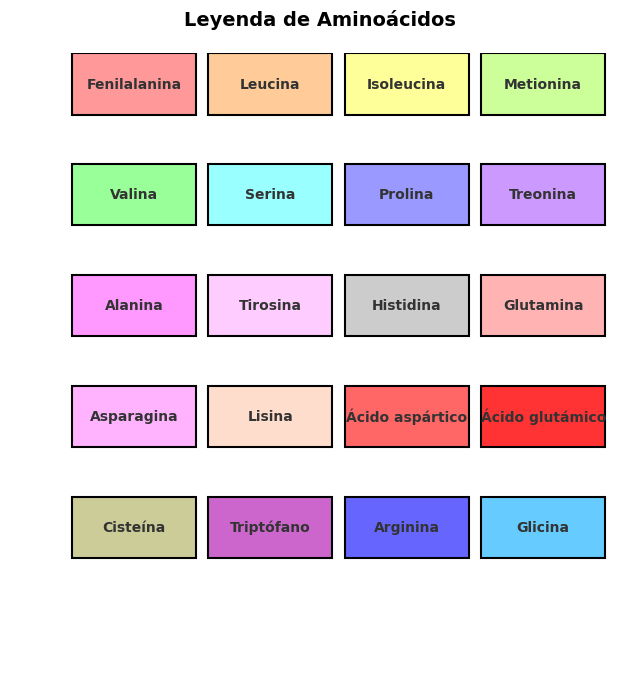

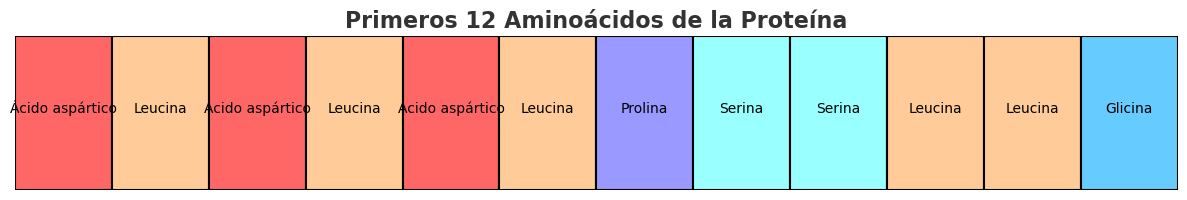

In [41]:
# Representación
draw_legend_aminoacidos()  # Llamada a la función de leyenda de aminoácidos
visualizar_traduccion_arn(proteina)

### **Interfaz**

Este código crea una aplicación gráfica con **Tkinter** para simular los procesos de **replicación**, **transcripción** y **traducción** del ADN, usando gráficos generados por **matplotlib**. Incluye:

- **ADNVisualizer**: Muestra gráficamente dos hebras de ADN y su replicación.
- **ARNVisualizer**: Visualiza la secuencia de ARNm durante la transcripción.
- **ProteinaVisualizer**: Representa la secuencia de aminoácidos tras la traducción.

La clase principal, **DNAApp**, permite al usuario realizar estos procesos paso a paso mediante botones y ver los resultados visualizados en tiempo real.


===== Iniciando la replicación de ADN =====

----- Topoisomerasa -----
Topoisomerasa: Relajando la tensión de la molécula de ADN.

----- Topoisomerasa -----
Topoisomerasa: Relajando la tensión de la molécula de ADN.

----- Helicasa -----
Helicasa: Separando las dos hebras de ADN en la horquilla de replicación.

----- Proteínas SSB -----
Proteínas SSB: Estabilizando la hebra sencilla para evitar su reconexión.

----- Exonucleasa -----
Exonucleasa: Eliminando el primer de la cadena líder.

----- Proteínas SSB -----
Proteínas SSB: Estabilizando la hebra sencilla para evitar su reconexión.

----- ADN Ligasa -----
ADN ligasa: Uniendo los fragmentos de Okazaki en la hebra retardada.

===== Resultados de la replicación =====
Hebra líder original:    CATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTACTTTGGTCACCCATGGGCATTTGCTGTTGAAGTGACCTAGATTTGCCATCGAGCCTCCTTGGGAGCTTTCTTGTTGGCGAGATCTAAACCCCTGCCCGGCGGAGTTGGGCGCCAAGTCATATGACACATAATTGGTGAAGGGGGTGGTAATCCTGCCCTGACCCTCCCCAAATTATTTTTTTAACAACTCTCAG

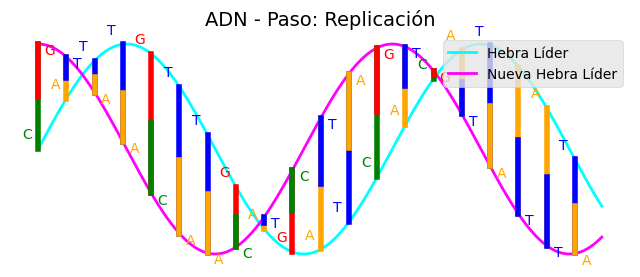

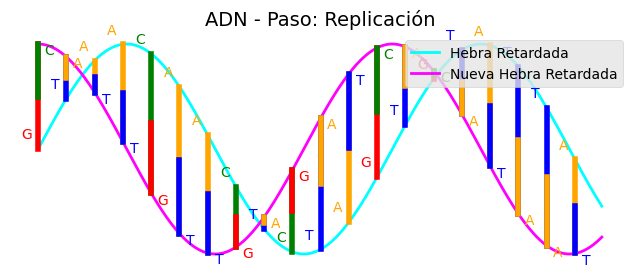

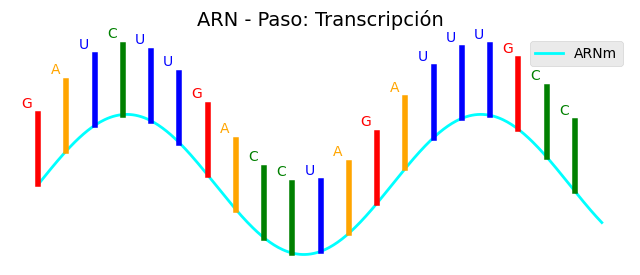

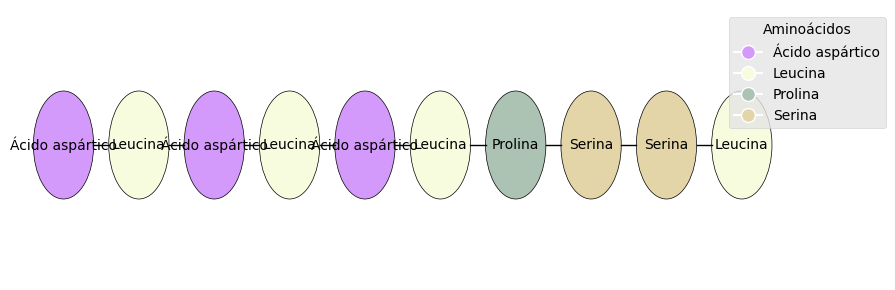

In [42]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
import random  # Para la función de proteínas

# --- Clase para el gráfico del ADN ---
class ADNVisualizer:
    def __init__(self, dna_sequence1, dna_sequence2, step='Replicación', label1="Hebra 1", label2="Hebra 2"):
        self.dna_sequence1 = dna_sequence1
        self.dna_sequence2 = dna_sequence2
        self.step = step
        self.label1 = label1
        self.label2 = label2

    def plot_dna_helix(self, start=0, end=None):
        fig, ax = plt.subplots(figsize=(8, 3))  # Gráficos más horizontales

        if end is None:
            end = len(self.dna_sequence1)

        # Limitar la longitud de las secuencias
        dna_sequence1 = self.dna_sequence1[start:end]
        dna_sequence2 = self.dna_sequence2[start:end]

        x = np.linspace(0, 10, len(dna_sequence1) * 20)
        y1 = np.sin(x) * 0.5  # Hebra 1
        y2 = np.sin(x + np.pi / 2) * 0.5  # Hebra 2 (desfasada)

        color_pairs = {'A': 'orange', 'C': 'green', 'T': 'blue', 'G': 'red'}

        ax.plot(x, y1, color='cyan', lw=2, label=self.label1)
        ax.plot(x, y2, color='magenta', lw=2, label=self.label2)

        for i in range(len(dna_sequence1)):
            base1 = dna_sequence1[i]
            base2 = dna_sequence2[i]
            ax.plot([x[i * 20], x[i * 20]], [y1[i * 20], y2[i * 20]], color=color_pairs[base1], lw=4)
            ax.plot([x[i * 20], x[i * 20]], [(y1[i * 20] + y2[i * 20]) / 2, y2[i * 20]], color=color_pairs[base2], lw=4)
            ax.text(x[i * 20] - 0.2, y1[i * 20] + 0.05, base1, color=color_pairs[base1], fontsize=10, ha='center')
            ax.text(x[i * 20] + 0.2, y2[i * 20] - 0.05, base2, color=color_pairs[base2], fontsize=10, ha='center')

        ax.set_title(f'ADN - Paso: {self.step}', fontsize=14)
        ax.axis('off')
        ax.legend(loc='upper right')

        return fig


# --- Clase para el gráfico del ARN ---
class ARNVisualizer:
    def __init__(self, arn_sequence, step='Transcripción'):
        self.arn_sequence = arn_sequence
        self.step = step

    def plot_arn(self, start=0, end=None):
        fig, ax = plt.subplots(figsize=(8, 3))

        arn_sequence = self.arn_sequence[start:end]

        x = np.linspace(0, 10, len(arn_sequence) * 20)
        y = np.sin(x) * 0.5

        color_pairs = {'A': 'orange', 'C': 'green', 'G': 'red', 'U': 'blue'}

        ax.plot(x, y, color='cyan', lw=2, label="ARNm")

        for i in range(len(arn_sequence)):
            base = arn_sequence[i]
            ax.plot([x[i * 20], x[i * 20]], [y[i * 20], y[i * 20] + 0.5], color=color_pairs[base], lw=4)
            ax.text(x[i * 20] - 0.2, y[i * 20] + 0.55, base, color=color_pairs[base], fontsize=10, ha='center')

        ax.set_title(f'ARN - Paso: {self.step}', fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        ax.legend(loc='upper right')

        return fig


# --- Clase para el gráfico de las proteínas ---
class ProteinaVisualizer:
    def __init__(self, proteina):
        self.proteina = proteina[:10]  # Truncar la proteína a los primeros 5 aminoácidos

    def plot_proteins(self):
        fig, ax = plt.subplots(figsize=(9, 3))

        num_aminoacidos = len(self.proteina)
        x = np.arange(num_aminoacidos)
        y = np.zeros(num_aminoacidos)

        colores = {}
        for aa in self.proteina:
            if aa not in colores:
                # Generar colores con valores de RGB entre 0.6 y 1 para obtener colores claros
                colores[aa] = (random.uniform(0.6, 1), random.uniform(0.6, 1), random.uniform(0.6, 1))

        for i in range(num_aminoacidos):
            radius = 0.4
            circle = plt.Circle((x[i], y[i]), radius, color=colores[self.proteina[i]], ec='black')
            ax.add_patch(circle)
            ax.text(x[i], y[i], self.proteina[i], ha='center', va='center', fontsize=10, color='black')

            if i > 0:
                ax.plot([x[i-1] + radius, x[i] - radius], [y[i], y[i]], color='black', lw=1)

        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[aa], markersize=10, label=aa) for aa in colores]
        ax.legend(handles=handles, title="Aminoácidos", loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1))

        ax.set_xlim(-0.5, num_aminoacidos - 0.5)
        ax.set_ylim(-1, 1)
        ax.axis('off')
        plt.tight_layout()

        return fig


# --- Clase principal de la aplicación ---
class DNAApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Simulación de ADN - Replicación y Transcripción")

        # Botones para la simulación
        self.step_button = tk.Button(master, text="Paso 1: Replicar", command=self.replicar_adn)
        self.step_button.pack()

        self.transcription_button = tk.Button(master, text="Paso 2: Transcribir", command=self.transcribe)
        self.transcription_button.pack()

        self.translation_button = tk.Button(master, text="Paso 3: Traducir", command=self.translate)
        self.translation_button.pack()

        self.reset_button = tk.Button(master, text="Reset", command=self.reset)
        self.reset_button.pack()

        # Frame común para todos los gráficos
        self.canvas_frame = tk.Frame(master)
        self.canvas_frame.pack(fill=tk.BOTH, expand=True)

        # Inicializar variables de canvas y datos
        self.canvases = []  # Lista para manejar múltiples gráficos
        self.zoom_start = 0


    def replicar_adn(self):
        self.clean_canvas()  # Limpiar gráficos anteriores

        try:
            # Reemplaza esto con tu función de replicación real
            (self.hebra_lider, self.nueva_hebra_lider), (self.hebra_retardada, self.nueva_hebra_retardada) = replicacion_completa_adn(hebra_original_1, hebra_original_2)
            end = min(self.zoom_start + 20, len(self.hebra_lider))
            start = self.zoom_start

            visualizer_lider = ADNVisualizer(self.hebra_lider, self.nueva_hebra_lider, label1="Hebra Líder", label2="Nueva Hebra Líder")
            fig_lider = visualizer_lider.plot_dna_helix(start=start, end=end)

            visualizer_retardada = ADNVisualizer(self.hebra_retardada, self.nueva_hebra_retardada, label1="Hebra Retardada", label2="Nueva Hebra Retardada")
            fig_retardada = visualizer_retardada.plot_dna_helix(start=start, end=end)

            # Mostrar ambas gráficas
            self.show_figures([fig_lider, fig_retardada])

            self.zoom_start += 20
        except Exception as e:
            print(f"Error en la replicación: {e}")

   
    def transcribe(self):
        self.clean_canvas()  # Limpiar gráficos anteriores

        try:
            arn_sequence = proceso_transcripcion(self.hebra_lider, self.hebra_retardada)
            self.ARNm_maduro = arn_sequence  # Guardar la secuencia de ARN para la traducción

            end = min(20, len(arn_sequence))
            start = 0

            visualizer = ARNVisualizer(arn_sequence)
            fig_arn = visualizer.plot_arn(start=start, end=end)

            # Mostrar solo la gráfica de ARN
            self.show_figures([fig_arn])

        except Exception as e:
            print(f"Error en la transcripción: {e}")

    def translate(self):
        self.clean_canvas()  # Limpiar gráficos anteriores

        try:
            proteina = traducir_arn_a_proteina(self.ARNm_maduro)
            visualizer = ProteinaVisualizer(proteina)
            fig_proteinas = visualizer.plot_proteins()

            # Mostrar la gráfica de proteínas
            self.show_figures([fig_proteinas])

        except Exception as e:
            print(f"Error en la traducción: {e}")

    def reset(self):
        self.clean_canvas()
        self.zoom_start = 0

    def clean_canvas(self):
        # Eliminar todos los gráficos previos
        for canvas in self.canvases:
            canvas.get_tk_widget().destroy()
        self.canvases = []  # Reiniciar la lista de canvases

    def show_figures(self, figures):
        for fig in figures:
            canvas = FigureCanvasTkAgg(fig, master=self.canvas_frame)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
            self.canvases.append(canvas)  # Agregar cada canvas a la lista


# --- Crear y ejecutar la aplicación ---
root = tk.Tk()
app = DNAApp(root)
root.mainloop()